In [1]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string
import nltk
import scapy
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from textblob import TextBlob
nltk.download('stopwords')
#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#transformers
#import transformers
#from transformers import BertModel
#from transformers import BertTokenizer
#from transformers import AdamW, get_linear_schedule_with_warmup

#PyTorch LSTM
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
#torch.manual_seed(seed_value)
#torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

#os and warnings
import os
import random
import warnings
os.environ['KMP_DUPLICATE_LIB_OK']='True'
warnings.filterwarnings('ignore')
nltk.download('punkt')


from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score , recall_score
#from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer
#from transformers.data.processors import SingleSentenceClassificationProcessor
#from transformers import Trainer , TrainingArguments
#from transformers.trainer_utils import EvaluationStrategy
#from transformers.data.processors.utils import InputFeatures
#from torch.utils.data import Dataset
#from torch.utils.data import DataLoader
#from sklearn.utils import resample

import logging

logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

c:\Users\oessa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oessa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oessa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 432x288 with 0 Axes>

In [2]:
df = pd.read_csv("LABR.tsv",sep='\t')
df.columns = ['label' , 'ID1' , 'ID2' , 'ID3' , 'sentence']
cleaned = df.drop(['ID1' , 'ID2' , 'ID3'], axis=1)
cleaned.head()

,label,sentence
0,4,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...
1,4,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...
2,1,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...
3,5,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...
4,5,"""عزازيل"" هو اسم رواية يوسف زيدان الثانية و ال..."


In [5]:
def mark_sentiment(rating):
    if(rating<3):
        return 0
    elif (rating == 3):
        return 2
    else:
        return 1

In [6]:
cleaned['label'] = cleaned['label'].apply(lambda x:mark_sentiment(x))
cleaned.head()

,label,sentence
0,1,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...
1,1,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...
2,0,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...
3,1,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...
4,1,"""عزازيل"" هو اسم رواية يوسف زيدان الثانية و ال..."


In [46]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","كان","ّأيّان"}

In [8]:
st = ISRIStemmer()
def stemNLTK(text):
    # tokenize
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ty = st.stem(w)
        cleaned.append(ty)
    return " ".join(cleaned)

stemNLTK("كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله ")

'كتب رئع عقد ان ريه كله لخص جمل'

In [9]:
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

normalizeArabic("مَرَّتْ أوَانَ العِيدِ بَيْنَ نَوَاهِدٍ مِثْلِ الشُّمُوسِ لِحَاظُهُنَّ ظِبَاء")

'مرت اوان العيد بين نواهد مثل الشموس لحاظهن ظباء'

In [10]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

remove_stop_words("مرت اوان العيد بين نواهد مثل الشموس لحاظهن ظباء")

'مرت اوان العيد نواهد الشموس لحاظهن ظباء'

In [11]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    #Stemming
    text = stemNLTK(text)
    return text

In [51]:
%time
cleaned['sentence'] = cleaned['sentence'].apply(lambda x:clean_text(x))
cleaned.head()

Wall time: 0 ns


,label,sentence,text_len
0,1,متع قرت روي بلا شك وحل الش دند عزازيل بلا هده ...,13
1,1,ريه ارخ جوا خار ءلف فتر ارخ ندر نول روء كتب بد...,24
2,0,اني قدر ريه سبب سبب اخر درس قيم عبر اتت فوت او...,337
3,1,كهن طلق اسم هيب تيم وثن هيب فر قرت وشت امه سيح...,89
4,1,عزازيل اسم ريه وسف زيد صدر ءخر دار شرق جذب اسم...,619


In [52]:
cleaned['sentence'].duplicated().sum()

123

In [53]:
cleaned.drop_duplicates("sentence", inplace=True)
data = cleaned

# Calculate Length of sentence and preprocessing

In [54]:
text_len = []
for text in data.sentence:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
    
data['text_len'] = text_len

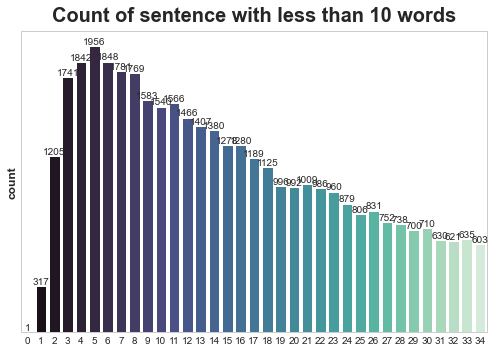

In [55]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='text_len', data=data[data['text_len'] < 35 ], palette='mako')
plt.title('Count of sentence with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [56]:
data = data[data['text_len'] > 1]

In [57]:
data.sort_values(by=['text_len'], ascending=False)

,label,sentence,text_len
44671,1,اه اه طرق سلك ربم اكن لتم حصل نسخ كتب رهب ماع ...,1986
1846,1,لحب حدث ادب حدث هنء ادب فجع فما كبر سحه حدث صل...,1971
12808,1,قطف كتب طبءع بدد صرع عبد كتب عبد رحم ككب بدد م...,1898
21587,1,كتب شيماء عيس عرض دكتور عبدالوهاب سير صحب وسع ...,1861
10737,1,نسي حلم مستغانمي اجب تحب مره ونس ينس رجل جمع ت...,1609
...,...,...,...
54246,1,عجب نهي,2
54248,1,متع نهي,2
54254,1,بدع بدع,2
54258,1,قصه بدع,2


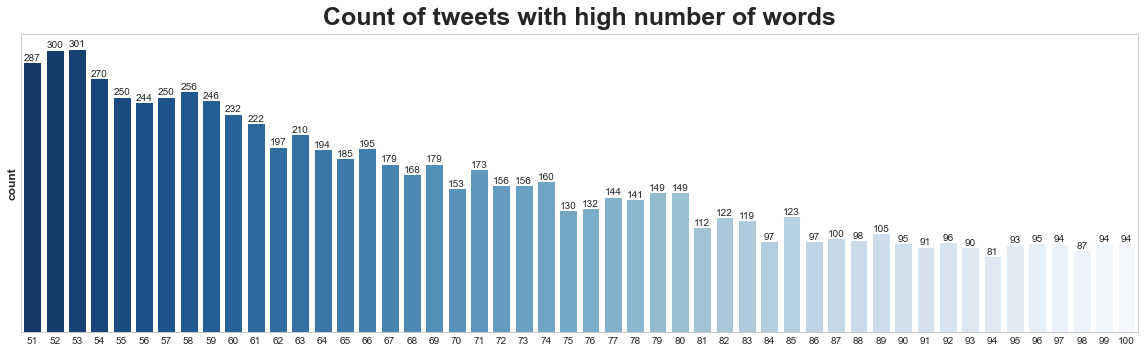

In [58]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=data[(data['text_len']<=100) & (data['text_len']>50)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [59]:
data = data[data['text_len'] < 140]

In [60]:
max_len = np.max(data['text_len'])
max_len 

139

In [61]:
data.label.value_counts()

1    37668
2    10927
0     7392
Name: label, dtype: int64

In [62]:
data.sort_values(by=["text_len"], ascending=False)

,label,sentence,text_len
17903,2,ريه معه كعد حمد راد حفظ سلب نمء رغم نوع ده موا...,139
6316,1,متع درج تصف بسط يمز ريي بسط طرح بسط ستي رصد كت...,139
51889,2,يحي بدا يبد دءر اظن وضح طلق ويع طلق قوا تتم وج...,139
4084,1,ونا دلق كوب لبن علي ريل شكل لحج نجب مش عرف بحس...,139
55966,2,صرح وقع اني سقر كتب ادب عبر سير ذتي جنس ادب شك...,139
...,...,...,...
35937,1,وجع فقط,2
55599,1,حقءق صدم,2
18603,1,تعب معه,2
6633,2,كتب لطف,2


# Balancing Data Classes

In [64]:
data.label.value_counts()

1    37668
2    10927
0     7392
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

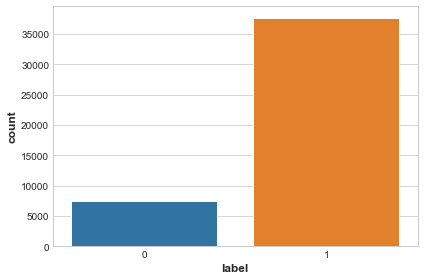

In [65]:
data = data[data['label'] < 2]
sns.countplot(x=data["label"])

In [66]:
datasetNeg , datasetPos, = (g for _,g in data.groupby('label'))
datasetPos = datasetPos.iloc[(37469 - 7365 ) : ]
data = pd.concat([datasetPos,datasetNeg])
data.label.value_counts()

1    7564
0    7392
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

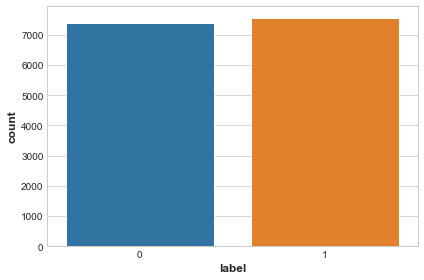

In [67]:
sns.countplot(x=data["label"])

# Split data

In [68]:
X = data['sentence']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

# TF-IDF

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer() 


# Knn model

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline

ind=0
max = 0
for i in range(51 ,70 , 2) :
    knn_Classifier = KNeighborsClassifier(n_neighbors=i , algorithm='auto')
    from sklearn.pipeline import make_pipeline
    pipe=make_pipeline(vectorizer,knn_Classifier)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    if accuracy_score(y_test,y_pred) > max:
        ind=i
        max= accuracy_score(y_test,y_pred)

print(max ," ", ind  )
    
    

0.7777406417112299   59


In [100]:
knn_Classifier = KNeighborsClassifier(n_neighbors=ind , algorithm='auto')
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(vectorizer,knn_Classifier)
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=59))])

In [101]:
y_pred=pipe.predict(X_test)
y_pred[1]

1

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.7777406417112299

In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: " , accuracy_score(y_test,y_pred))
print("Recall score: " ,recall_score(y_test,y_pred))
print("Precision score: " ,precision_score(y_test,y_pred))
print("F1 score: " ,f1_score(y_test,y_pred))

Accuracy score:  0.7777406417112299
Recall score:  0.8248512888301388
Precision score:  0.7572815533980582
F1 score:  0.7896235368554255


# Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
